In [90]:
from estnltk.text import Text
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
data = pd.read_csv("../data/postimees.txt", sep="\t", names=['website', 'id', 'datetime', 'title', 'share_count', 'comment_count', 'read_count', 'author', 'section', 'content'])
data = data.drop_duplicates(subset=['id'])
data = data.drop(columns=['website', 'section'])
data.head()

,id,datetime,title,share_count,comment_count,read_count,author,content
0,6839008,2019-11-30T13:50:49+02:00,Tänavatantsijad tõid Leedu võistluselt Tartusse topeltvõidu,0.0,0,14,{'Lenel Karu'},"Lithuanian Cup ehk Baltimaade üks suurimaid tantsuvõistlusi on igal aastal kohtumispaik, kus võtavad mõõtu mitusada tantsijat üle Euroopa. Sel aastal rabasid tartlased tänavatantsukategooriates kaks esikohta ning tõid koju mitmeid häid tulemusi Battle-vormis võistlustel said tantsijad möödunud nädalavahetusel Leedus osaleda erinevates stiilides soolos (1vs1) või paarides (2vs2). Avatud vanuseastmes läks house'i stiilis esimene koht Iris Remselile (JJ-Street). Remsel ütles, et oli võistlustele tulnud pärast pikemat haigusperioodi ning võit oli hea üllatus. «Juba mitu kuud varem võtsin eesmärgiks tuua koju võit välisriigist. Leedus ma finaalis lihtsalt tantsisin ja nautisin muusikat. Vastas oli minu klubikaaslane, mis tegi viimase vooru veel toredamaks,» rääkis ta. Teise esikoha tõid tartlastest all styles 2vs2 kategoorias Markus Tõnissaar ja Hanna Mändmaa (JJ-Street). Mändmaa sõnul oli tase Baltimaade kohta kõrge. «Meie vastastel finaalis tundus olevat parem ettevalmistus, aga otsustasime lihtsalt võistlust nautida ja endast parim anda. Tulemus rabas meid postiivses mõttes jalust,» ütles Mändmaa. Tema paariline Tõnissaar lisas, et võit andis enesekindlust järgmisteks võistlusteks. «Konkreetselt tänavatantsu battlitel oli tase ikkagi üsna tugev. Poolfinaalis ja finaalis läks ikka rebimiseks, et võita,» kinnitas Tõnissaar. Tartlased pääsesid edasi igas battle'i kategoorias. Nooremas vanuserühmas hip-hop kids 1vs1 pääses ligi 100 osaleja hulgast poolfinaali Emma Tiitus (JJ-Street), kaheksa parima hulka jõudsid veel samast klubist pärit Georg Mattias Pedjasaar, Carola Selberg ja Elis Kommer. Tiituse treeneri Annely Kõrveli sõnul ületasid noorimad osalejad võistlusega ennast varasemast tunduvalt rohkem. «Emma jäi pingelisel võistlusel iseendaks ning võib õlale patsutada, sest üks samm on eesmärgile lähemale astutud,» kinnitas Kõrvel. House 1vs1 nooremas vanuserühmas jõudis poolfinaali Romet Prušinki. Tema treeneri Kreete Uustalu sõnul on selles tantsustiilis lastele vähe võistlusi. «Laste hulgas oli tase väga kõrge, seega oli see hea võimalus näha neil teisi konkurente. Ma ei pea laste puhul võitu kõige tähtsamaks, sest ka kaotama peab õppima,» rääkis Uustalu."
1,6838978,2019-11-30T12:49:30+02:00,Tartu ärinõuandla andis välja Hea Tegu auhinnad,0.0,0,22,{'Tartu Postimees'},"Tartu ärinõuandla tunnustas konkursil Hea Tegu tänavusi parimaid Tartumaa säravad organisatsioone ning inimesi. Välja anti tunnustused neljas erinevas kategoorias: kodanikuühenduse tegevuse toetaja, aasta vabakondlane, mittetulundusühendus, projektita sündinud tegu. Tartu ärinõuandla MTÜ konsultant Kadri Pau sõnul on Tartumaa vabaühenduste seas palju tugevaid organisatsioone ja säravaid tegijaid, kelle algatusvõime ja entusiasm on kõigile eeskujuks. «Oluline on tuua välja ja tähelepanu pöörata kõikidele nendele tublidele inimestele ja organisatsioonidele, kes vabatahtlikult panustavad meie kodukoha arengusse, ning avaldada seeläbi austust nende tehtud tööle,» sõnas Pau. Laureaadid valiti kokku kutsustud komisjoni poolt, kuhu kuulusid Tartu ärinõuandla, Kodukant Tartumaa, Tartumaa Omavalitsuste Liidu ja teiste koostööpartnerite esindajad. Mittetulundusühing Tartu Maheaed on tegutsenud 8 aastat. Siis oli maheaial üle aparikümne maaharija, kuid tänaseks on maheaia liikmete arv üle 180ne. Lisaks teeb maheaed koostööd lasteaedade, koolide ja erinevate organisatsioonidega, et levitada linnaaianduse põhimõtet ja säästvat eluviisi. Vabakondlane Kaire Vahejõe eest vedada on kohe Tartu piiri taga tegutsev Lohva Külaselts. Väga tulemuslikult oskab Kaire kogukonda kaasata ja koostööle ärgitada nii kohalikke ettevõtteid kui ka vallavalitsust, lisaks erinevate huviringide, tegevuste korraldamine külas elavatele lastele ja eakatele. Kirepi Kogukonna Tartu-Valga siltide tegu jäi silma kõigil

In [132]:
print("Number of articles: " + str(data.shape[0]))

Number of articles: 214021


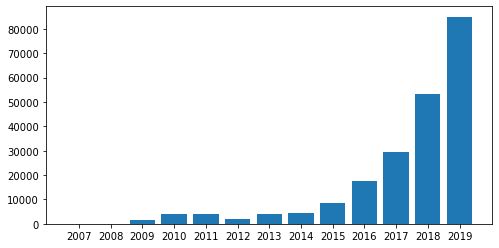

In [133]:
years = {}
for i in range(2007, 2020):
    years[i] =  data[data['datetime'].str.match(str(i) + "-*")].shape[0]
plt.figure(figsize=[8,4])
plt.bar(years.keys(), years.values())
plt.xticks(ticks=range(2007,2020))
plt.show()

In [134]:
pd.set_option('display.max_rows', 8000)
data.author.value_counts().head(20)

{'BNS'}                      7272
{'Postimees Sport'}          6466
{'Elu24.ee'}                 5407
{'Kodustiil.ee'}             4980
{'Reporter.ee'}              4933
{'Tartu Postimees'}          4117
{'Aivar Pau'}                3933
{'Kultuuritoimetus'}         3910
{'Inna-Katrin Hein'}         3439
{'Kuido Saarpuu'}            3348
{'Sõbranna'}                 3285
{'Põhjarannik'}              3226
{'Kelli Põlendik'}           3142
{'Johanna Vahuri'}           2829
{'Lõuna-Eesti Postimees'}    2688
{'SH'}                       2667
{'Maiken Mägi'}              2511
{'Majandus24'}               2431
{'PM'}                       2416
{'AFP / BNS'}                2261
Name: author, dtype: int64

Most shared articles

In [8]:
pd.set_option('display.max_colwidth', 100)
wo_content_data = data.drop(columns=['content', 'id'])
wo_content_data.sort_values(by=["share_count"], ascending=False).head(5)

,datetime,title,share_count,comment_count,read_count,author
218985,2019-05-01T14:45:00+03:00,Igor Gräzin «matsiplikast» president Kaljulaidist: Kersti vaimne tase ei ületa vene lüpsja-karja...,12325.0,74,85096,{'Elu24.ee'}
69682,2019-05-15T08:17:06+03:00,Keskkonnaamet kutsub inimesi tungivalt üles muruniitmise ja rohimisega tagasi tõmbama,11480.0,4,65845,{'Anna-Liisa Mets'}
80466,2019-07-04T19:21:28+03:00,Video: tantsupeo peaproov kiirvaates,9238.0,0,27348,{'Eero Vabamägi'}
65257,2019-07-04T19:35:46+03:00,Õnnestus: väikese Annabeli geeniravi sai tehtud ja läks hästi,9135.0,2,23556,{'PM Tervis'}
71532,2019-02-24T09:14:04+02:00,Galerii: vaata kui kaunilt on loomariigis esindatud Eesti lipuvärvid,8836.0,2,36961,{'Kelli Põlendik'}


Articles with most comments

In [9]:
wo_content_data.sort_values(by=["comment_count"], ascending=False).head(5)

,datetime,title,share_count,comment_count,read_count,author
27783,2019-03-05T11:55:14+02:00,Otseblogi: Jüri Ratas kutsus EKRE poliitikud korrale,172.0,1158,1030334,{'Postimees'}
12682,2019-07-19T13:19:53+03:00,Kaljulaid: vihkan EKRE poliitikute käitumist ja palun selle pärast vabandust,1629.0,401,82258,{'Postimees/BNS'}
71717,2018-11-16T12:16:29+02:00,"BLOGI, FOTOD JA VIDEOD Valitsuskriisi kuues päev: president kutsus valitsuse umbusaldust kaaluva...",24.0,399,162950,{'Postimees'}
25350,2019-03-25T10:36:07+02:00,"Mart ja Martin Helme ähvardavad: kui läbirääkimised tuksi keeratakse, tuleb plahvatus",4128.0,315,95993,{'Vilja Kiisler'}
9884,2019-08-19T20:13:36+03:00,President Kaljulaid: Martin Helmel ei peaks olema kohta valitsuses,1769.0,308,57195,{'Postimees'}


Articles with most reads.

In [10]:
wo_content_data.sort_values(by=["read_count"], ascending=False).head(5)

,datetime,title,share_count,comment_count,read_count,author
27783,2019-03-05T11:55:14+02:00,Otseblogi: Jüri Ratas kutsus EKRE poliitikud korrale,172.0,1158,1030334,{'Postimees'}
130161,2019-03-07T15:00:00+02:00,"Dopingublogi: Kärp tunnistas üles, et tarvitas dopingut koos Tammjärve ja Veerpaluga",0.0,150,829039,"{'Merili Luuk', 'Andres Vaher, Seefeld', 'Kris Ilves'}"
61112,2019-10-27T14:30:06+02:00,Blogi: tehtud - Ott Tänak ja Martin Järveoja on maailmameistrid!,79.0,59,624064,{'Postimees Sport'}
78287,2019-10-06T15:25:39+03:00,Blogi: maksimum! Tänak võitis Walesi ralli ja ka punktikatse,34.0,18,540057,{'Postimees Sport'}
193395,2019-06-16T14:27:20+03:00,Blogi: Ott Tänak langes Sardiinia MM-rallil viimase katsega esikohalt viiendaks,146.0,67,520482,{'Postimees Sport'}


Can get the number of paragraps, sentences and words, to see how much this influences the overal popularity of the article.

In [11]:
word_count = pd.read_csv("word_count.csv", sep=",", names=['word', 'amount'], encoding="utf-8")
word_count = word_count.sort_values(by="amount", ascending=False)
word_count.head(40)

,word,amount
12,",",3532380
22,.,3177809
25,olema,2267904
5,ja,1421754
63,see,927073
115,et,690298
50,tema,552076
125,ei,483552
47,kui,444605
140,mis,434697


In [12]:
title_word_count = pd.read_csv("title_word_count.csv", sep=",", names=['word', 'amount'], encoding="utf-8")
title_word_count = title_word_count.sort_values(by="amount", ascending=False)
pd.set_option('display.max_rows', 40)
title_word_count.head(40)

,word,amount
21,:,69470
95,olema,31097
1,",",30227
72,ja,24022
546,?,15304
5,Eesti,14151
73,saama,13202
164,ei,9652
727,mis,9510
65,uus,8455


In [92]:
def count_words (row):
        text = Text(str(row.content)).analyse('morphology').words
        count = 0
        for span in text:
            count += 1
        return count

data['content_words'] = data[0:10].apply(lambda row: count_words(row), axis=1)

In [114]:
text = data.content[0].split(" ")
len(text)

270

In [121]:
title_words = pd.read_csv("title_words.csv", sep=",", names=['id', 'datetime', 'title', 'content', 'share_count',
                    'comment_count', 'read_count', 'author', 'title_words'], encoding="utf-8")
title_words = title_words.sort_values(by="read_count", ascending=False)

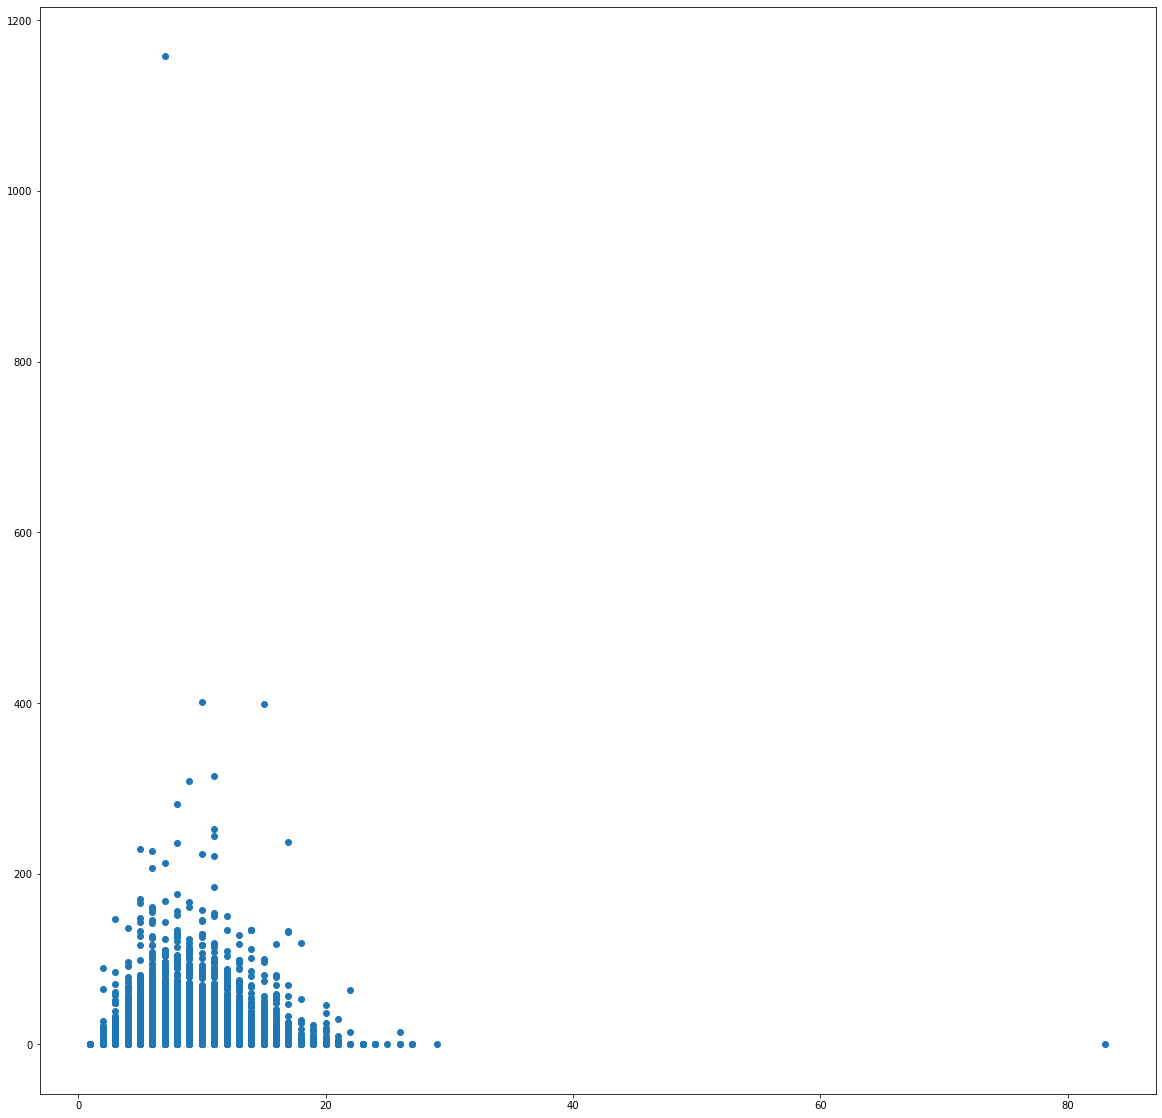

In [127]:
plt.figure(figsize=[20,20])

plt.scatter(title_words.title_words, title_words.comment_count)

In [126]:
content_words = pd.read_csv("content_words.csv", sep=",", names=['id', 'datetime', 'title', 'content', 'share_count',
                    'comment_count', 'read_count', 'author', 'content_words'], encoding="utf-8")
content_words = content_words.sort_values(by="read_count", ascending=False)

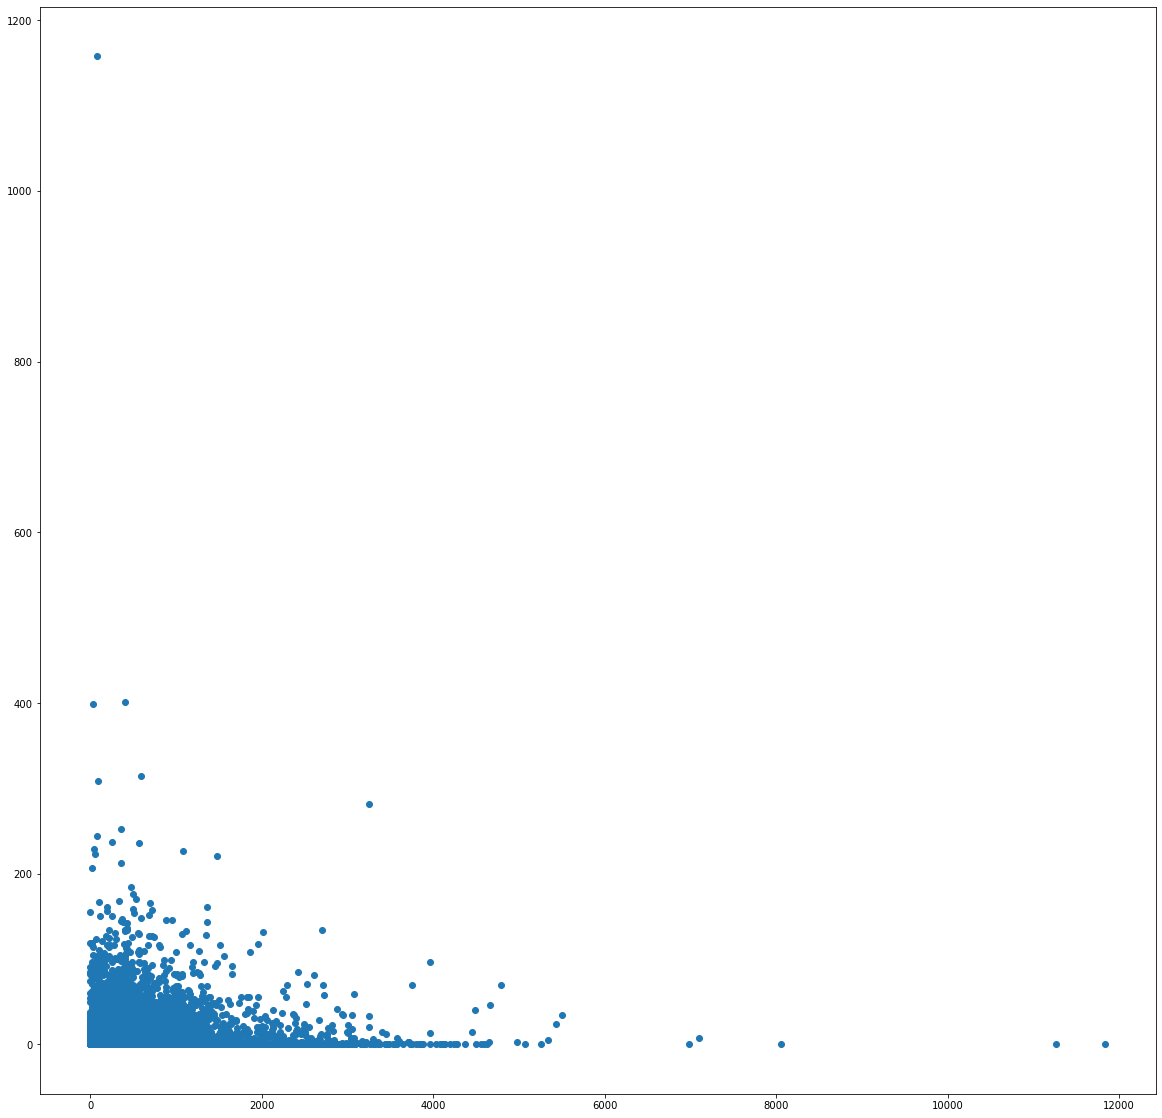

In [130]:
plt.figure(figsize=[20,20])

plt.scatter(content_words.content_words, title_words.comment_count)

In [182]:
avg_reads_for)) = pd.read_csv("count_for_each.csv", sep=",", names=['word', 'reads', 'freq'], encoding="utf-8")

def method(row):
    return row.reads / row.freq

avg_reads['avg_reads'] = avg_reads.apply(lambda i: method(i), axis=1)

avg_reads[avg_reads['freq'] > 20].sort_values(by="avg_reads", ascending=False).head(10)

,word,reads,freq,avg_reads
9576,rahvaerakond,277254,21,13202.571429
9664,ametnik,335187,26,12891.807692
3191,Järviku,478799,38,12599.973684
3188,maaeluminister,511566,42,12180.142857
9754,põhjendama,352500,29,12155.172414
3189,Järvik,481989,40,12049.725000
1165,Reformierakond,280537,24,11689.041667
1651,EKRE,538651,48,11221.895833
7509,veterinaar,234273,21,11155.857143
1587,Helme,432828,39,11098.153846


In [202]:
avg_reads = pd.read_csv("count_for_each_title.csv", sep=",", names=['word', 'reads', 'freq'], encoding="utf-8")

def method(row):
    return row.reads / row.freq

avg_reads['avg_reads'] = avg_reads.apply(lambda i: method(i), axis=1)

avg_reads[(avg_reads['freq'] >= 70) & (avg_reads['freq'] <= 100)].sort_values(by="avg_reads", ascending=False).head(30)

,word,reads,freq,avg_reads
3724,blogi,1257681,73,17228.506849
8161,Nolani,957272,70,13675.314286
15070,ränk,1258835,94,13391.861702
10043,kohutav,1116631,84,13293.226190
32072,Nolan,990296,75,13203.946667
334,ELU24,1261853,98,12876.051020
4326,Wales,1101638,94,11719.553191
4467,Rõivas,970235,85,11414.529412
5656,näinud,875629,78,11226.012821
7969,avalikkus,901518,82,10994.121951
